# Linear Regression - Project Exercise

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Data

In [2]:
cudf=pd.read_csv('Ecommerce Customers')

**Checking the data**

In [3]:
cudf.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
cudf.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
cudf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.4+ KB


## Exploratory Data Analysis

In [6]:
sns.set_palette('coolwarm')
sns.set_style('whitegrid')

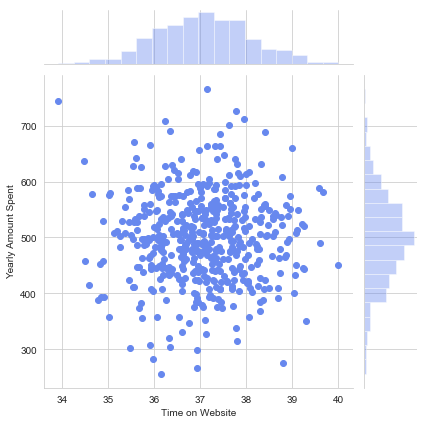

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=cudf)

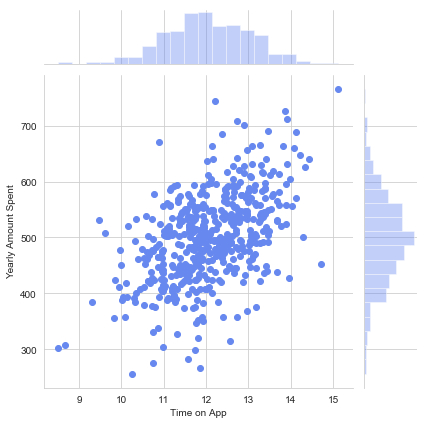

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=cudf)

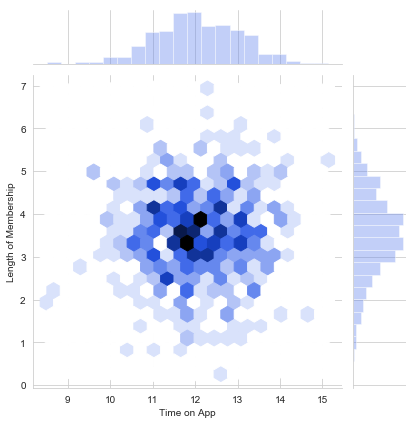

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership',data=cudf,kind='hex')

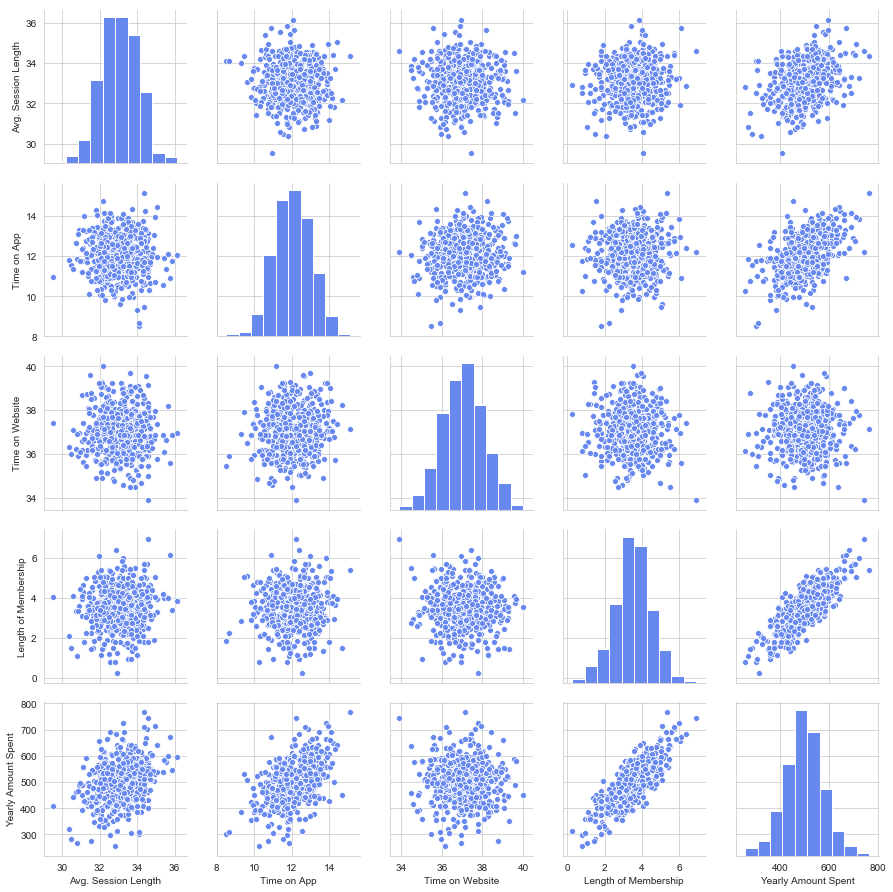

In [10]:
sns.pairplot(cudf)

In [11]:
#Yearly Amount Spent is direclty correlated with Length of Membership.

**Creating a linear model plot of Yearly Amount Spent vs. Length of Membership.**

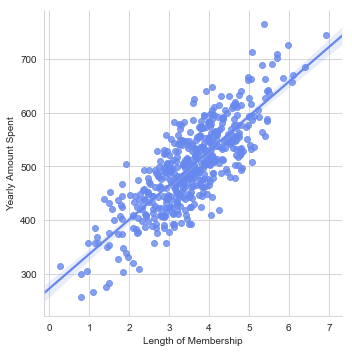

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=cudf)

## Training and Testing Data

** Seting X as input data and y as output. **

In [13]:
cudf.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
X=cudf[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=cudf['Yearly Amount Spent']

** Useing model_selection.train_test_split from sklearn to split the data into training and testing sets.**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

** Importing LinearRegression from sklearn.linear_model **

In [17]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lr.**

In [18]:
lr=LinearRegression()

** Train/fit lr on the training data.**

In [19]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Printing out the coefficients of the model**

In [26]:
print(lr.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

** Using lr.predict() to predict off the X_test set of the data.**

In [21]:
pred=lr.predict(X_test)

** Creates a scatterplot of the real test values versus the predicted values. **

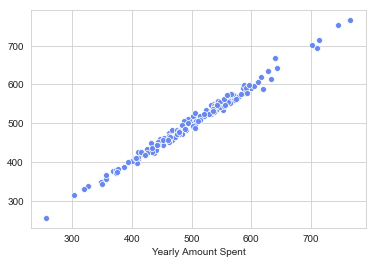

In [22]:
sns.scatterplot(x=y_test,y=pred)

## Evaluating the Model


** Calculates the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [23]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MSER:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 7.2281486534308295
MSE: 79.81305165097434
MSER: 8.933815066978628


## Residuals

**Ploting a histogram of the residuals to make sure it looks normally distributed.**

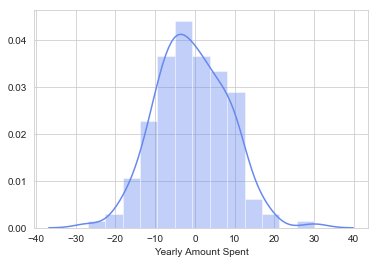

In [24]:
sns.distplot(y_test-pred)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [25]:
pd.DataFrame(lr.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

#If we hold all other feature fixed we can say, a unit increase in Avg. Session Length equals 26 dollars spent.
#If we hold all other feature fixed we can say, a unit increase in Time on App equals 38.6 dollars spent.
#If we hold all other feature fixed we can say, a unit increase in Time on Website equals 0.19 dollars spent.
#If we hold all other feature fixed we can say, a unit increase in Length of Membership equals 61.28 dollars spent.

**Do you think the company should focus more on their mobile app or on their website?**

#Looking at the data the app generates x322 more money than the website, but I think we need to investigate more before reaching to a conclusion.